In [1]:
library(data.table)
library(ggplot2)

In [2]:
# Load and parse PANTHER GO enrichment tables
go_enrich = lapply(1:17, function(k) {
    d = fread(paste0("cNMF_k17_GO_BP_PANTHER_top100/cNMF_", k, ".txt"), skip=11)
    
    #Rename PANTHER enrichment table
    colnames(d) = c("term", "reflist", "n_overlap", "n_expected", "over_under", "fold_enrichment", "p", "FDR")
    
    # clamp fold enrichment, convert to numerical
    d$fold_enrichment[d$fold_enrichment == "< 0.01"] = 0.01
    d$fold_enrichment[d$fold_enrichment == "> 100"] = 100
    
    d$fold_enrichment = as.numeric(d$fold_enrichment)
    
    # Add column with cNMF components
    d$cNMF = paste0("cNMF_", k)
    
    return(d)
})

In [3]:
# Order tables by significance
go_enrich = lapply(go_enrich, function(d) {
    d[order(d$p)]
})

In [4]:
go_enrich[[7]]

term,reflist,n_overlap,n_expected,over_under,fold_enrichment,p,FDR,cNMF
<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
cellular transition metal ion homeostasis (GO:0046916),112,10,0.57,+,17.51,6.28e-10,9.85e-06,cNMF_7
detoxification of copper ion (GO:0010273),16,6,0.08,+,73.53,1.03e-09,8.09e-06,cNMF_7
stress response to copper ion (GO:1990169),16,6,0.08,+,73.53,1.03e-09,5.39e-06,cNMF_7
cytoplasmic translation (GO:0002181),124,10,0.63,+,15.81,1.58e-09,6.20e-06,cNMF_7
cellular zinc ion homeostasis (GO:0006882),37,7,0.19,+,37.10,2.32e-09,7.28e-06,cNMF_7
detoxification of inorganic compound (GO:0061687),19,6,0.10,+,61.92,2.42e-09,6.32e-06,cNMF_7
cellular response to cadmium ion (GO:0071276),38,7,0.19,+,36.12,2.74e-09,6.13e-06,cNMF_7
stress response to metal ion (GO:0097501),20,6,0.10,+,58.83,3.13e-09,6.14e-06,cNMF_7
zinc ion homeostasis (GO:0055069),40,7,0.20,+,34.31,3.76e-09,6.56e-06,cNMF_7


In [5]:
# Get significantly enriched GO terms
go_enrich_sig = lapply(go_enrich, function(d) {
    #d[d$FDR < 0.01 & d$over_under == "+" & d$fold_enrichment > 2]
    #d[d$FDR < 0.01 & d$over_under == "+" & d$fold_enrichment > 2 & d$reflist < 1000]
    
    d[d$FDR < 0.01 & d$over_under == "+" & d$fold_enrichment > 2 & d$reflist < 1000]

    #d[d$FDR < 0.01 & d$over_under == "+" & d$fold_enrichment > 5 & d$n_overlap >=3]
})
sapply(go_enrich_sig, nrow)  # count numbers of signicant terms

[1] 113   4  44  42 145   3  61   0   5 143  84  64  76  35  29   6 166

In [6]:
# get top GO terms among significant associations
# Assumes that tables are ordered
top_terms = lapply(go_enrich_sig, function(d) {
    na.omit(d$term[1:5])
})

top_terms = unique(unlist(top_terms))

In [7]:
top_terms

[1] "response to cytokine (GO:0034097)"                                  
 [2] "cytoplasmic translation (GO:0002181)"                               
 [3] "cellular response to cytokine stimulus (GO:0071345)"                
 [4] "negative regulation of apoptotic process (GO:0043066)"              
 [5] "negative regulation of programmed cell death (GO:0043069)"          
 [6] "extracellular matrix organization (GO:0030198)"                     
 [7] "extracellular structure organization (GO:0043062)"                  
 [8] "external encapsulating structure organization (GO:0045229)"         
 [9] "cell adhesion (GO:0007155)"                                         
[10] "oxidative phosphorylation (GO:0006119)"                             
[11] "aerobic electron transport chain (GO:0019646)"                      
[12] "aerobic respiration (GO:0009060)"                                   
[13] "mitochondrial ATP synthesis coupled electron transport (GO:0042775)"
[14] "ATP synthesis coupled electron transport (GO:0042773)"              
[15] "collagen fibril organization (GO:0030199)"                          
[16] "collagen metabolic process (GO:0032963)"                            
[17] "protein folding (GO:0006457)"                                       
[18] "response to unfolded protein (GO:0006986)"                          
[19] "response to temperature stimulus (GO:0009266)"                      
[20] "response to topologically incorrect protein (GO:0035966)"           
[21] "response to heat (GO:0009408)"                                      
[22] "cellular transition metal ion homeostasis (GO:0046916)"             
[23] "detoxification of copper ion (GO:0010273)"                          
[24] "stress response to copper ion (GO:1990169)"                         
[25] "cellular zinc ion homeostasis (GO:0006882)"                         
[26] "positive regulation of plasma membrane repair (GO:1905686)"         
[27] "regulation of plasma membrane organization (GO:1903729)"            
[28] "regulation of cell migration (GO:0030334)"                          
[29] "regulation of cell motility (GO:2000145)"                           
[30] "skeletal system development (GO:0001501)"                           
[31] "negative regulation of developmental process (GO:0051093)"          
[32] "negative regulation of cell differentiation (GO:0045596)"           
[33] "muscle structure development (GO:0061061)"                          
[34] "actin filament-based process (GO:0030029)"                          
[35] "actin cytoskeleton organization (GO:0030036)"                       
[36] "muscle cell differentiation (GO:0042692)"                           
[37] "muscle system process (GO:0003012)"                                 
[38] "translation (GO:0006412)"                                           
[39] "peptide biosynthetic process (GO:0043043)"                          
[40] "peptide metabolic process (GO:0006518)"                             
[41] "amide biosynthetic process (GO:0043604)"                            
[42] "cell cycle process (GO:0022402)"                                    
[43] "cell division (GO:0051301)"                                         
[44] "negative regulation of organelle organization (GO:0010639)"         
[45] "negative regulation of cellular component organization (GO:0051129)"
[46] "mitotic cell cycle process (GO:1903047)"                            
[47] "circulatory system development (GO:0072359)"                        
[48] "blood vessel development (GO:0001568)"                              
[49] "vasculature development (GO:0001944)"                               
[50] "tube morphogenesis (GO:0035239)"                                    
[51] "blood vessel morphogenesis (GO:0048514)"                            
[52] "Notch signaling pathway (GO:0007219)"                               
[53] "regulation of blood circulation (GO:1903522)"                       
[54] "regulation of heart 

In [8]:
# Filtered table with top terms only
go_enrich_all = rbindlist(go_enrich)

In [9]:
go_enrich_all_top = go_enrich_all[go_enrich_all$term %in% top_terms]

In [10]:
#data.frame(go_enrich_all_top)

In [11]:
go_enrich_all_top$term = factor(go_enrich_all_top$term, levels=top_terms)
go_enrich_all_top$cNMF = factor(go_enrich_all_top$cNMF, levels=paste0("cNMF_", 17:1))

In [12]:
# Sets size of non-significant dots to zero by excluding non significant 
go_enrich_all_top = go_enrich_all_top[go_enrich_all_top$FDR < 0.01]

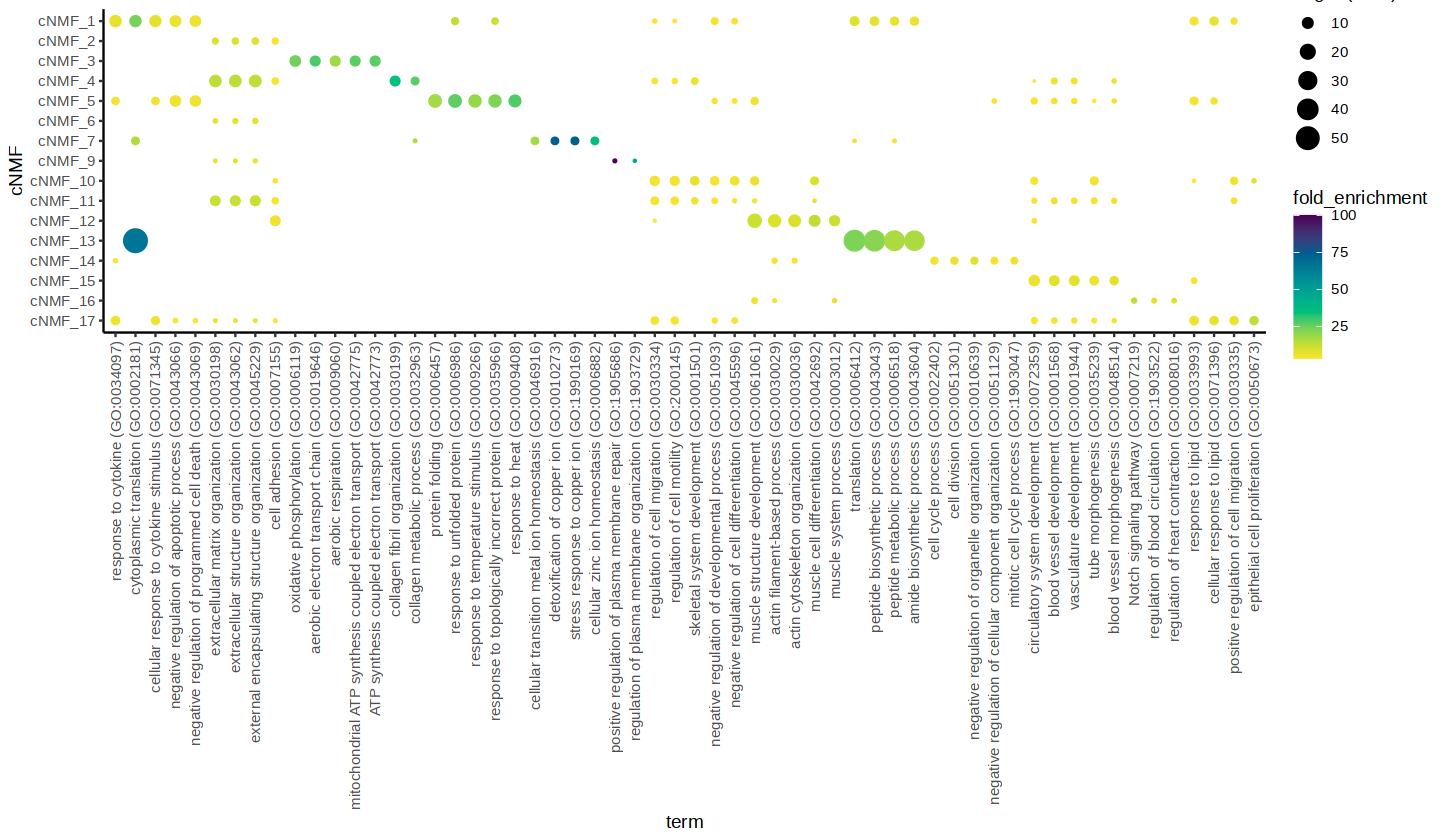

In [13]:
width = 12
height = 7
options(repr.plot.width=width, repr.plot.height=height)

ggplot(data.frame(go_enrich_all_top), aes(x=term, y=cNMF, color=fold_enrichment, size=-log10(FDR))) +
    #geom_tile() +
    geom_point() +
    scale_size_continuous(range=c(0, 6)) +
    #scale_color_gradientn(colors=rev(hcl.colors(20, "Inferno"))) +
    scale_color_gradientn(colors=rev(hcl.colors(20, "Viridis"))) +

    #scale_color_viridis(colors="magma") +
    theme_classic() +
    theme(
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=1),
       # plot.margin=margin(2, 2, 2, 2, "cm")
    )
ggsave("figures/cNMF_k17_GO_dotplot.pdf", width=width, height=height)

In [188]:
# Plot seleted terms

In [189]:
#sel_terms = unique(go_enrich_all$term[grep("inflammat", go_enrich_all$term)])

In [190]:
#sel_terms = unique(go_enrich_all$term[grep("inflammat|antigen", go_enrich_all$term)])

In [191]:
sel_terms = unique(go_enrich_all$term[grep("inflammat|antigen|cytokine", go_enrich_all$term)])
sel_terms = sel_terms[!grepl("cytokinesis", sel_terms)]  # not cytokinesis

In [192]:
#sel_terms

In [193]:
go_enrich_sel = go_enrich_all[go_enrich_all$term %in% sel_terms]

In [197]:
# strip GO ids from terms
go_enrich_sel$term = sapply(strsplit(go_enrich_sel$term, " \\("), function(x) x[1])

In [194]:
# Sets size of non-significant dots to zero by excluding non significant 
go_enrich_sel = go_enrich_sel[go_enrich_sel$FDR < 0.1]

In [195]:
# Order plots by significance
go_enrich_sel = go_enrich_sel[order(go_enrich_sel$p, decreasing=FALSE), ]

go_enrich_sel$term = factor(go_enrich_sel$term, levels=unique(go_enrich_sel$term))
go_enrich_sel$cNMF

In [206]:
go_enrich_sel$cNMF = factor(go_enrich_sel$cNMF, levels=unique(go_enrich_sel$cNMF))

In [207]:
#go_enrich_sel = rev(go_enrich_sel)

In [208]:
#go_enrich_sel$ter

In [209]:
#go_enrich_sel$term

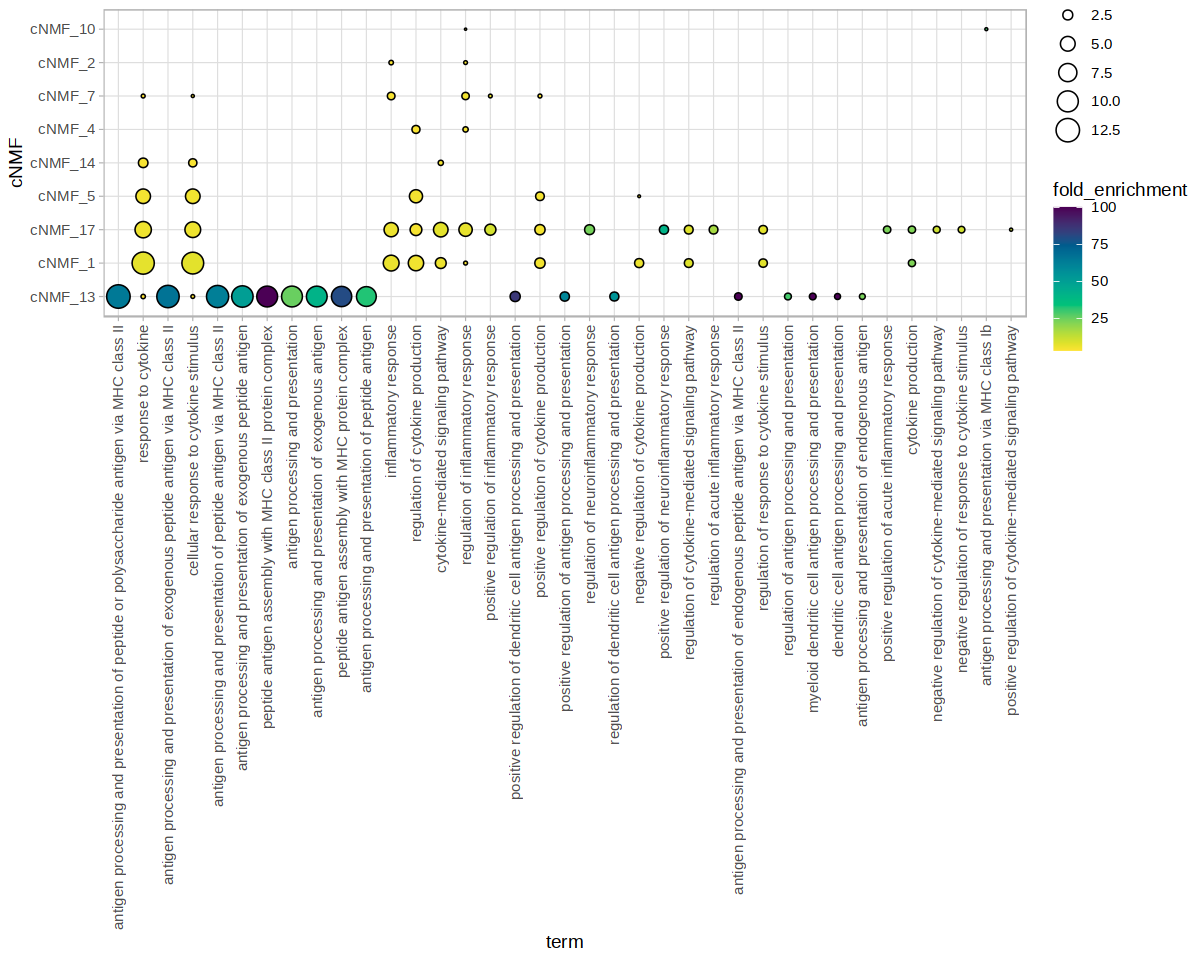

In [210]:
width = 10
height = 8
options(repr.plot.width=width, repr.plot.height=height)

ggplot(data.frame(go_enrich_sel), aes(x=term, y=cNMF, fill=fold_enrichment, size=-log10(FDR))) +
    #geom_tile() +
    geom_point(pch=21) +
    scale_size_continuous(range=c(0, 6)) +
    #scale_color_gradientn(colors=rev(hcl.colors(20, "Inferno"))) +
    scale_fill_gradientn(colors=rev(hcl.colors(20, "Viridis"))) +

    #scale_color_viridis(colors="magma") +
    #theme_classic() +
    theme_light() +
    theme(
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=1),
       # plot.margin=margin(2, 2, 2, 2, "cm")
    )

ggsave("figures/cNMF_k17_GO_inflammation_dotplot.pdf", width=width, height=height)

In [204]:
#unique(go_enrich_all$term[grep("antigen", go_enrich_all$term)])